In [70]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings('ignore')

### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализаваны.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

In [0]:
test = pd.read_csv('test.csv', header=0, sep=',')

In [140]:
test

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0.0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,0.103855,0.1875,0.0000,0.135949,0.350206,0.187419,0.756282,0.201911,0.316854,0.104583,0.01870,0.241379,0,0.75,0.423439,0.732260,0,0,0.666667,0.096500,0.199044,0.190843,0.187285,0.16958,0.294118,0.000000,0.000000,0.048000,0.150153,0.0000,...,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0.0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,0.125237,0.0625,0.0000,0.183958,0.359572,0.372014,0.508107,0.276535,0.101973,0.049800,0.00548,0.137931,1,0.00,0.360849,0.701909,1,1,0.166667,0.168664,0.031100,0.050400,0.200590,0.00000,0.242456,0.095800,0.220103,0.009230,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0.0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,0.266129,0.0625,0.0000,0.122230,0.586479,0.227994,0.368400,0.107220,0.043600,0.068400,0.00776,0.034500,1,0.00,0.367166,0.917836,0,1,0.000000,0.510178,0.032400,0.052700,0.000000,0.00000,0.058800,0.000000,0.000000,0.076500,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0.0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,0.118280,0.0625,0.0000,0.126692,0.527341,0.122608,0.530575,0.159911,0.071800,0.042500,0.00589,0.034500,1,0.00,0.396976,0.896885,1,1,0.000000,0.495344,0.110121,0.099100,0.000000,0.00000,0.058800,0.000000,0.000000,0.039900,0.000000,0.0637,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0.0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,0.000000,0.0000,0.0000,0.443063,0.546064,0.401079,0.415092,0.003930,0.112314,0.071400,0.00663,0.000000,1,0.00,0.474608,0.809131,0,1,0.000000,0.184156,0.000000,0.010300,0.000000,0.00000,0.000000,0.062000,0.307492,0.000000,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,0.066700,0.658812,0.10,0.0,0.305799,0.614877,0.180900,0.219328,0.617916,0.324679,0.000000,0.0625,0.0000,0.122440,0.317402,0.175343,0.317354,0.111463,0.038300,0.056000,0.00344,0.103448,1,0.00,0.362659,0.909747,1,1,0.000000,0.361296,0.080000,0.000000,0.100295,0.04000,0.073800,0.000000,0.000000,0.000000,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2497,0.033300,0.451048,0.00,0.0,0.230019,0.849600,0.114983,0.159589,0.916702,0.043200,0.000000,0.0625,0.0968,0.066600,0.545194,0.102796,0.659267,0.066000,0.088800,0.020200,0.00413,0.034500,1,0.00,0.458303,0.808139,0,1,0.000000,0.511234,0.140546,0.032600,0.000000,0.00000,0.058800,0.000000,0.000000,0.062900,0.159156,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2498,0.000000,0.537887,0.15,0.0,0.144312,0.667734,0.283773,0.591918,0.760417,0.275136,0.000000,0.0000,0.0000,0.087800,0.361702,0.327979,0.627336,0.214557,0.090400,0.036500,0.00423,0.172414,1,0.00,0.476059,0.785415,1,1,0.000000,0.260175,0.111601,0.062100,0.250738,0.00000,0.000000,0.000000,0.000000,0.122491,0.075100,0.0000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2499,0.033300,0.538504,0.10,0.0,0.1

In [0]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [75]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
bioresponce.shape

(3751, 1777)

In [77]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [0]:
bioresponce_target = bioresponce.Activity.values

In [79]:
print('bioresponse = 1: {:.2f}\nbioresponse = 0: {:.2f}'.format(sum(bioresponce_target)/float(len(bioresponce_target)), 
                1.0 - sum(bioresponce_target)/float(len(bioresponce_target))))

bioresponse = 1: 0.54
bioresponse = 0: 0.46


In [0]:
bioresponce_data = bioresponce.iloc[:, 1:]

### Модель RandomForestClassifier

#### Кривые обучения для деревьев небольшой глубиной 

In [0]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [0]:
# посмотрим, как лучше разделить датасет на обучающую и валидационную выборки
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy') # берем 0.1 от сета и с шагом 0.2 идем до 1,
                                                                                                 # кросс-валидация на 3 фолда, 
                                                                                                 # метрика accuracy

In [83]:
print('количество обучающих объектов', train_sizes)
print('оценки качества на train', train_scores.mean(axis = 1)) # усредняем по строчкам, ибо было 3 фолда
print('оценки качества на test', test_scores.mean(axis = 1))

количество обучающих объектов [ 250  750 1250 1750 2250]
оценки качества на train [0.74933333 0.71333333 0.68453333 0.69104762 0.69022222]
оценки качества на test [0.62356685 0.64195598 0.65369955 0.66248974 0.66728527]


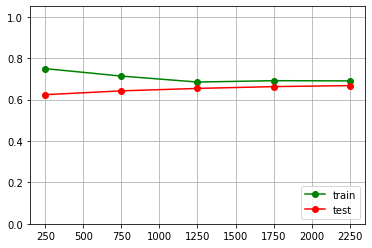

In [84]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [0]:
# говорит о том, что модель данной сложности не может многое выиграть за счет того, что мы обогатим данные. 
# значит, пробуем усложнить модель!

#### Кривые обучения для деревьев большей глубины

In [0]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1) # увеличиваем глубину дерева 

In [0]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

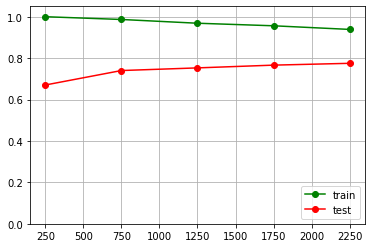

In [88]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [0]:
# С ростом обучающей выборки, качество на тесте продолжает расти. 
# В конце оно начинает расти несколько медленнее, но тем не менее тренд заметен. 
# То же самое можно сказать про обучение — качество на обучающей выборке продолжает падать не очень быстро. 
# Отсюда мы можем сделать вывод, что модель данной сложности действительно получает некоторые преимущества от того, что мы добавляем объекты в обучение. 
# Таким образом, в данном случае имеет смысл увеличивать объем обучающей выборки.

### Сравним RandomForest и XGBoost

In [0]:
n_trees = [1] + list(range(10, 55, 5))

In [91]:
n_trees

[1, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [92]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                             scoring = 'accuracy', cv = 3)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 12.6 s, sys: 30.8 ms, total: 12.6 s
Wall time: 12.6 s


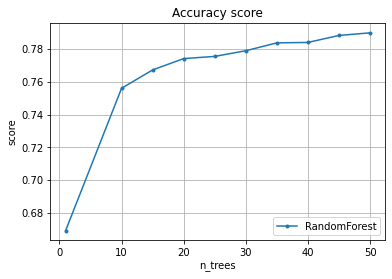

In [93]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [94]:
%%time

import xgboost as xgb
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                             scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 2min 10s, sys: 159 ms, total: 2min 10s
Wall time: 2min 10s


In [95]:
xgb_scoring

matrix([[0.76498801, 0.756     , 0.756     ],
        [0.77617906, 0.7752    , 0.7688    ],
        [0.77857714, 0.7744    , 0.7768    ],
        [0.7873701 , 0.7784    , 0.7768    ],
        [0.79216627, 0.7736    , 0.7832    ],
        [0.79776179, 0.7776    , 0.7824    ],
        [0.79616307, 0.7816    , 0.78      ],
        [0.79296563, 0.7848    , 0.7792    ],
        [0.79856115, 0.7832    , 0.7808    ],
        [0.79936051, 0.7832    , 0.7832    ]])

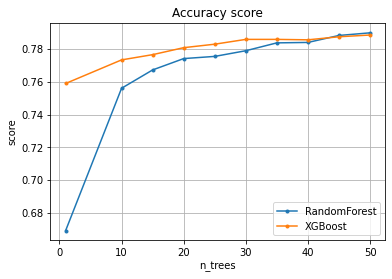

In [96]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

### Сравним еще 

In [0]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
X_train, X_test, y_train, y_test = train_test_split(bioresponce_data, bioresponce_target, test_size=0.33,  random_state = 1)

In [0]:
# поищем для RandomForestClassifier лучшие параметры

In [0]:
param_grid = { 
 #   'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [153]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
CV_rfc = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv= k_fold, scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)
print(CV_rfc.best_estimator_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}
0.8471347781991356
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [0]:
# итого

In [0]:
lr = LogisticRegression()
svc = LinearSVC(C=1.0)
rfc = ensemble.RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=1000)
bc = CatBoostClassifier(verbose=0, n_estimators=500)

xb = XGBClassifier(n_estimators=41, max_depth=5, learning_rate=0.3)
lgbm = LGBMClassifier(n_estimators=114)
histg = HistGradientBoostingClassifier()
grb = GradientBoostingClassifier(n_estimators=600)

In [0]:
from sklearn.calibration import calibration_curve

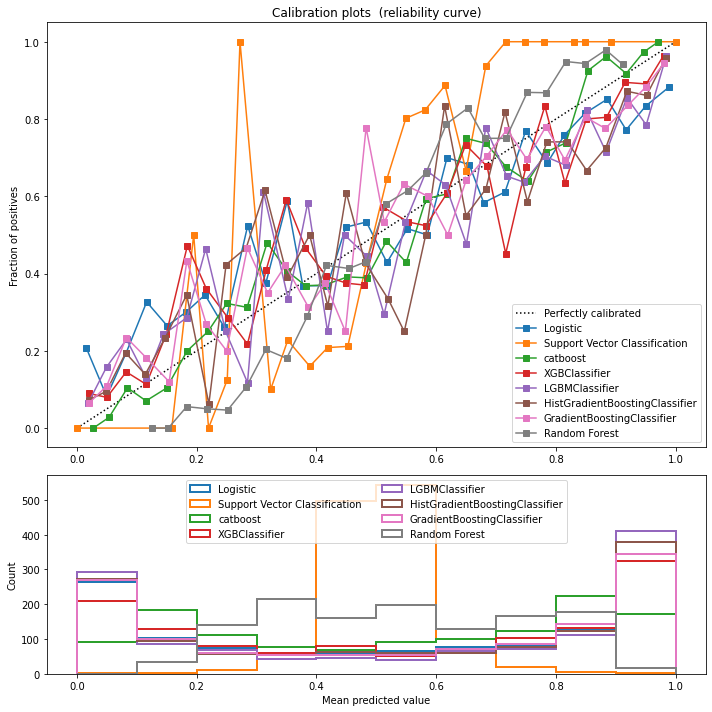

In [157]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (svc, 'Support Vector Classification'),
                  (bc, 'catboost'),
                  (xb, 'XGBClassifier'),
                  (lgbm, 'LGBMClassifier'),
                  (histg, 'HistGradientBoostingClassifier'),
                  (grb, 'GradientBoostingClassifier'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=30)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

### Предсказания

In [166]:
grb.fit(bioresponce_data, bioresponce_target)
pd.DataFrame(zip(test.index+1,grb.predict_proba(test)[:, 1]), columns = ['MoleculeId','PredictedProbability'])

,MoleculeId,PredictedProbability
0,1,0.905174
1,2,0.981090
2,3,0.574855
3,4,0.970805
4,5,0.015032
...,...,...
2496,2497,0.502233
2497,2498,0.140911
2498,2499,0.942889
2499,2500,0.752746


In [0]:
# 0.44300

In [164]:
histg.fit(bioresponce_data, bioresponce_target)
pd.DataFrame(zip(test.index+1,histg.predict_proba(test)[:, 1]), columns = ['MoleculeId','PredictedProbability'])

,MoleculeId,PredictedProbability
0,1,0.913130
1,2,0.988734
2,3,0.585359
3,4,0.981166
4,5,0.009633
...,...,...
2496,2497,0.571027
2497,2498,0.102142
2498,2499,0.945807
2499,2500,0.739653


In [0]:
# 0.43968

In [162]:
lgbm.fit(bioresponce_data, bioresponce_target)
pd.DataFrame(zip(test.index+1,lgbm.predict_proba(test)[:, 1]), columns = ['MoleculeId','PredictedProbability'])

,MoleculeId,PredictedProbability
0,1,0.956275
1,2,0.985309
2,3,0.544320
3,4,0.986893
4,5,0.022118
...,...,...
2496,2497,0.365987
2497,2498,0.021787
2498,2499,0.954740
2499,2500,0.728349


In [0]:
# 0.41066

In [160]:
xb.fit(bioresponce_data, bioresponce_target)
pd.DataFrame(zip(test.index+1,xb.predict_proba(test)[:, 1]), columns = ['MoleculeId','PredictedProbability'])

,MoleculeId,PredictedProbability
0,1,0.815596
1,2,0.997110
2,3,0.666206
3,4,0.982797
4,5,0.050117
...,...,...
2496,2497,0.419203
2497,2498,0.114353
2498,2499,0.914855
2499,2500,0.793710


In [0]:
# 0.44937

In [113]:
lr.fit(bioresponce_data, bioresponce_target)
pd.DataFrame(zip(test.index+1,lr.predict_proba(test)[:, 1]), columns = ['MoleculeId','PredictedProbability'])

,MoleculeId,PredictedProbability
0,1,0.932376
1,2,0.995521
2,3,0.290171
3,4,0.973332
4,5,0.013428
...,...,...
2496,2497,0.661331
2497,2498,0.056403
2498,2499,0.959051
2499,2500,0.793783


In [0]:
# 0.59570

In [115]:
svc.fit(bioresponce_data, bioresponce_target)
y_margins = svc.decision_function(test)
y_prob = (y_margins - y_margins.min()) / (y_margins.max() - y_margins.min())
y_prob
pd.DataFrame(zip(test.index+1,y_prob), columns = ['MoleculeId','PredictedProbability'])

,MoleculeId,PredictedProbability
0,1,0.517913
1,2,0.623945
2,3,0.478679
3,4,0.544067
4,5,0.363682
...,...,...
2496,2497,0.490592
2497,2498,0.427654
2498,2499,0.545135
2499,2500,0.507897


In [0]:
# 0.64224

In [118]:
rfc.fit(bioresponce_data, bioresponce_target)
pd.DataFrame(zip(test.index+1,rfc.predict_proba(test)[:, 1]), columns = ['MoleculeId','PredictedProbability'])

,MoleculeId,PredictedProbability
0,1,0.806311
1,2,0.848283
2,3,0.556502
3,4,0.865161
4,5,0.318209
...,...,...
2496,2497,0.438194
2497,2498,0.223615
2498,2499,0.823144
2499,2500,0.620456


In [0]:
# 0.50124

In [150]:
bc.fit(bioresponce_data, bioresponce_target)
pd.DataFrame(zip(test.index+1,bc.predict_proba(test)[:, 1]), columns = ['MoleculeId','PredictedProbability'])

,MoleculeId,PredictedProbability
0,1,0.893100
1,2,0.946428
2,3,0.417211
3,4,0.933095
4,5,0.038732
...,...,...
2496,2497,0.606307
2497,2498,0.096546
2498,2499,0.922847
2499,2500,0.805224


In [0]:
# 0.46041 (n = 50) --- 0.42857 (n = 500) ---- 0.42857 (n = 1000)

### Взвешенный ответ из лучших вариантов

In [0]:
predict = 0.8 * lgbm.predict_proba(test)[:, 1] + 0.2 * ((xb.predict_proba(test)[:, 1] + bc.predict_proba(test)[:, 1] + histg.predict_proba(test)[:, 1] + grb.predict_proba(test)[:, 1])/4)

In [189]:
predict

array([0.93813773, 0.98406451, 0.55037512, ..., 0.9500725 , 0.73707401,
       0.17253763])

In [0]:
# 0.40958

In [0]:
pd.DataFrame(zip(test.index+1,predict), columns = ['MoleculeId','PredictedProbability']).to_csv('vanguu.csv', sep=',', index=False)